<a href="https://colab.research.google.com/github/marcos-code/Analises/blob/main/Car_selling_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
dados = pd.read_csv('https://raw.githubusercontent.com/Arjya1999/car-selling-price-prediction/master/car%20data.csv')
dados.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0




#Dicionario Dataset

. Car_name - Nome do carro

. Year - Ano

. Selling_Price - preço de venda

. Present Price - Preço presente

. Kms_ Driven - KM rodados

. Fuel_type - Tipo de combustivel

. Seller Typer - Tipo de vendedor

. Transmission - Transmissão

. Owner - Proprietário


In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
#Linhas e colunas
dados.shape

(301, 9)

In [6]:
dados.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [18]:
dados['Selling_Price'].value_counts()

0.60     8
0.45     8
5.25     7
4.50     7
4.75     6
        ..
19.99    1
4.35     1
0.80     1
0.27     1
7.20     1
Name: Selling_Price, Length: 156, dtype: int64

In [21]:
# Vendas por ano
dados['Year'].value_counts()

2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2007     2
2003     2
2018     1
2004     1
Name: Year, dtype: int64

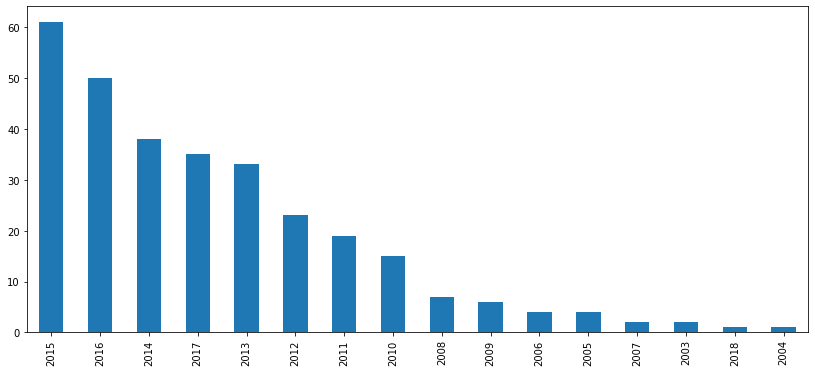

In [53]:
dados['Year'].value_counts().plot(kind='bar', figsize=(14,6));

In [22]:
dados['Car_Name'].value_counts()

city                 26
corolla altis        16
verna                14
fortuner             11
brio                 10
                     ..
TVS Jupyter           1
Honda Activa 125      1
Yamaha Fazer          1
Activa 4g             1
Suzuki Access 125     1
Name: Car_Name, Length: 98, dtype: int64

In [24]:
# Carro mais caro
dados[dados['Selling_Price'] == dados['Selling_Price'].max()]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
86,land cruiser,2010,35.0,92.6,78000,Diesel,Dealer,Manual,0


In [25]:
#Carro mais Barato
dados[dados['Selling_Price'] == dados['Selling_Price'].min()]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
200,Bajaj Pulsar 150,2006,0.1,0.75,92233,Petrol,Individual,Manual,0


In [29]:
#Carros mais caros
dados.loc[dados.groupby('Car_Name')['Present_Price'].idxmax()]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
37,800,2003,0.35,2.28,127000,Petrol,Individual,Manual,0
165,Activa 3g,2016,0.45,0.54,500,Petrol,Individual,Automatic,0
173,Activa 4g,2017,0.40,0.51,1300,Petrol,Individual,Automatic,0
195,Bajaj ct 100,2015,0.18,0.32,35000,Petrol,Individual,Manual,0
127,Bajaj Avenger 150,2016,0.75,0.80,7000,Petrol,Individual,Manual,0
...,...,...,...,...,...,...,...,...,...
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
215,verna,2012,4.50,9.40,36100,Petrol,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
18,wagon r,2015,3.25,5.09,35500,CNG,Dealer,Manual,0


In [35]:
# mostrar tipo de combustivel
print(dados['Fuel_Type'].unique())

['Petrol' 'Diesel' 'CNG']


In [45]:
dados['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [47]:
# Criando uma lista de todos os produtos vendidos
dados.loc[:,'Car_Name'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

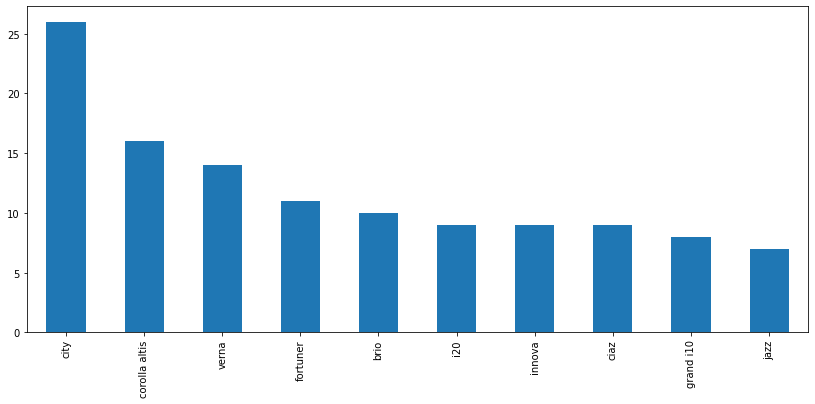

In [49]:
# Os 10 carros mais vendidos

dados['Car_Name'].value_counts(). head(10).plot(kind='bar', figsize=(14,6));

In [55]:
#tipos de Cambio
print(dados['Transmission'].unique())

['Manual' 'Automatic']


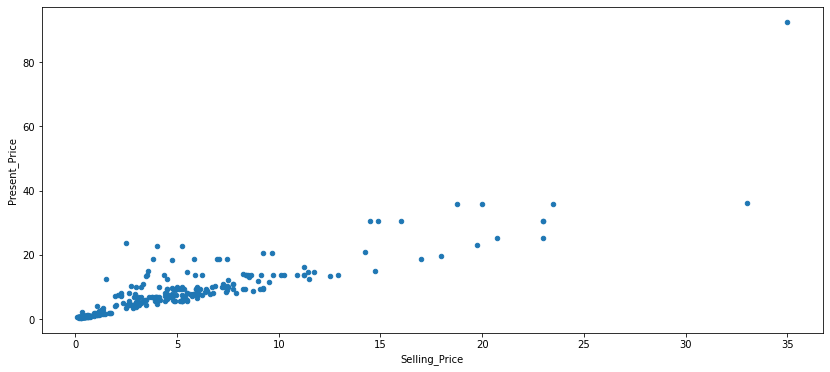

In [64]:
# relação entre preço de venda e valor presente

dados.plot(kind='scatter', x='Selling_Price', y='Present_Price', figsize=(14,6))

In [68]:
#Carros mais rodados
dados.loc[dados.groupby('Car_Name')['Kms_Driven'].idxmax()]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
37,800,2003,0.35,2.28,127000,Petrol,Individual,Manual,0
196,Activa 3g,2008,0.17,0.52,500000,Petrol,Individual,Automatic,0
173,Activa 4g,2017,0.40,0.51,1300,Petrol,Individual,Automatic,0
195,Bajaj ct 100,2015,0.18,0.32,35000,Petrol,Individual,Manual,0
127,Bajaj Avenger 150,2016,0.75,0.80,7000,Petrol,Individual,Manual,0
...,...,...,...,...,...,...,...,...,...
39,sx4,2003,2.25,7.98,62000,Petrol,Dealer,Manual,0
245,verna,2012,5.20,9.40,71000,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
47,wagon r,2006,1.05,4.15,65000,Petrol,Dealer,Manual,0
